<a href="https://colab.research.google.com/github/divyanshukr09/Linear-Regression-Practice/blob/main/Linear_Regession_Practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import pickle as pk

In [77]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [78]:
df.shape

(200, 5)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [80]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

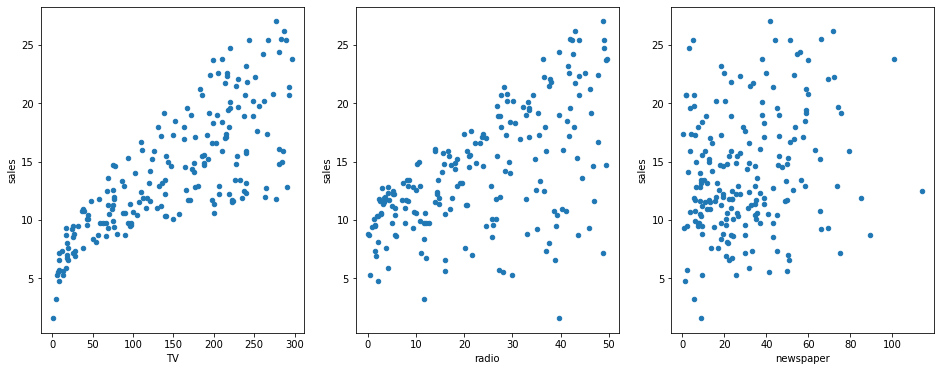

In [81]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y = "sales",ax=axs[0],figsize=(16,6))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [82]:
feature_cols =['TV']
X = df[feature_cols]
y = df.sales
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


In [83]:
# feature_cols =['newspaper']
# X = df[feature_cols]
# y = df.sales
# from sklearn.linear_model import LinearRegression
# lm= LinearRegression()
# lm.fit(X,y)
# print(lm.intercept_)
# print(lm.coef_)

In [84]:
# feature_cols =['radio']
# X = df[feature_cols]
# y = df.sales
# from sklearn.linear_model import LinearRegression
# lm= LinearRegression()
# lm.fit(X,y)
# print(lm.intercept_)
# print(lm.coef_)

In [85]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [86]:
preds = lm.predict(X_new)
preds

array([9.40942557])

In [87]:
X_new = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [88]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

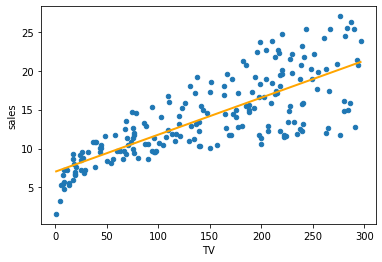

In [89]:
# first, plot the observed data
df.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='orange', linewidth=2)

In [90]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=df).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [91]:
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [92]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        17:10:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
lm = smf.ols(formula='sales ~ TV + radio', data=df).fit()
lm.rsquared

0.8971942610828956

In [94]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper',data=df).fit()
lm.rsquared

0.8972106381789522